<a href="https://colab.research.google.com/github/minglese89/Lectures_AdvCV_Experis2020/blob/main/CONV1D_PT04_dynamicTACs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pathlib
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D, Flatten, Dropout, Dense, LayerNormalization
from tensorflow.keras.optimizers import SGD

In [4]:
import pandas as pd 
import numpy as np
import pandas as pd
import tensorflow as tf

df_les = pd.read_csv('/content/TACS_lesion_PT04.csv')
df_ref = pd.read_csv('/content/TACS_ref_PT04.csv')

In [5]:
X_les = df_les.iloc[:, :-1].values
X_ref = df_ref.iloc[:, :-1].values
y_les = df_les.iloc[:, -1].values
y_ref = df_ref.iloc[:, -1].values
print(X_les.shape)
print(X_ref.shape)
print(y_les.shape)
print(y_ref.shape)

(8999, 45)
(8999, 45)
(8999,)
(8999,)


In [6]:
X = np.append(X_les, X_ref, axis=0)
#print(np.shape(X))
y = np.append(y_les, y_ref, axis=0)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(12598, 45)
(5400, 45)
(12598,)
(5400,)


In [10]:
model = Sequential()

#model.add(Input(shape=X2.shape[1:]))

#model.add(LayerNormalization())

model.add(Conv1D(64, 5, strides=2, activation = 'relu', padding="same", input_shape=(45,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2, strides=2, padding="valid"))

model.add(Conv1D(64, 3, strides=2, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2, strides=2, padding="valid"))

model.add(Conv1D(4, 3, strides=1, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2, strides=2, padding="valid"))

model.add(Flatten())

#model.add(LayerNormalization())

model.add(Dense(200))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

In [11]:
X2train = np.expand_dims(X_train.astype(float), axis=2)
X2test=np.expand_dims(X_test.astype(float), axis=2)

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X2train,y_train, validation_data=(X2test, y_test),epochs=200, batch_size=64)

Epoch 1/200
197/197 [==============================] - 4s 13ms/step - loss: 0.1204 - accuracy: 0.9422 - val_loss: 0.3921 - val_accuracy: 0.8720
Epoch 2/200
197/197 [==============================] - 2s 11ms/step - loss: 0.1156 - accuracy: 0.9462 - val_loss: 0.4001 - val_accuracy: 0.8702
Epoch 3/200
197/197 [==============================] - 2s 11ms/step - loss: 0.1094 - accuracy: 0.9494 - val_loss: 0.4241 - val_accuracy: 0.8698
Epoch 4/200
197/197 [==============================] - 2s 10ms/step - loss: 0.1159 - accuracy: 0.9464 - val_loss: 0.4065 - val_accuracy: 0.8635
Epoch 5/200
197/197 [==============================] - 2s 10ms/step - loss: 0.1133 - accuracy: 0.9471 - val_loss: 0.4664 - val_accuracy: 0.8587
Epoch 6/200
197/197 [==============================] - 2s 11ms/step - loss: 0.1204 - accuracy: 0.9478 - val_loss: 0.4095 - val_accuracy: 0.8681
Epoch 7/200
197/197 [==============================] - 2s 11ms/step - loss: 0.1176 - accuracy: 0.9448 - val_loss: 0.4273 - val_accuracy:

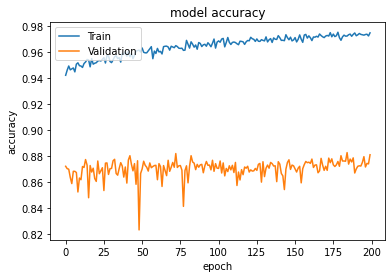

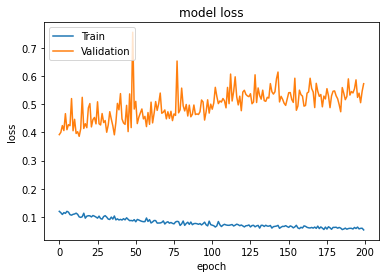

In [14]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
scores = model.evaluate(X2test,y_test,verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

accuracy: 88.09%


Test the model on NOT wb corrected TACs

In [20]:
df_les = pd.read_csv('/content/TACS_lesion_PT04.csv')
df_ref = pd.read_csv('/content/TACS_ref_PT04.csv')

In [21]:
X_les2 = df_les.iloc[:, :-1].values
X_ref2 = df_ref.iloc[:, :-1].values
y_les2 = df_les.iloc[:, -1].values
y_ref2 = df_ref.iloc[:, -1].values

In [22]:
X = np.append(X_les2, X_ref2, axis=0)
#print(np.shape(X))
y = np.append(y_les2, y_ref2, axis=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, random_state = 0)

X2train2 = np.expand_dims(X_train2.astype(float), axis=2)
X2test2=np.expand_dims(X_test2.astype(float), axis=2)

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model.fit(X2train2,y_train2, validation_data=(X2test2, y_test2),epochs=200, batch_size=64)

Epoch 1/200
197/197 [==============================] - 4s 13ms/step - loss: 0.7276 - accuracy: 0.7445 - val_loss: 0.5060 - val_accuracy: 0.7641
Epoch 2/200
197/197 [==============================] - 2s 11ms/step - loss: 0.4273 - accuracy: 0.7943 - val_loss: 0.4547 - val_accuracy: 0.7889
Epoch 3/200
197/197 [==============================] - 2s 11ms/step - loss: 0.3753 - accuracy: 0.8209 - val_loss: 0.4195 - val_accuracy: 0.8220
Epoch 4/200
197/197 [==============================] - 2s 10ms/step - loss: 0.3426 - accuracy: 0.8394 - val_loss: 0.4616 - val_accuracy: 0.8196
Epoch 5/200
197/197 [==============================] - 2s 11ms/step - loss: 0.3259 - accuracy: 0.8501 - val_loss: 0.3194 - val_accuracy: 0.8417
Epoch 6/200
197/197 [==============================] - 2s 11ms/step - loss: 0.3053 - accuracy: 0.8570 - val_loss: 0.2983 - val_accuracy: 0.8696
Epoch 7/200
197/197 [==============================] - 2s 11ms/step - loss: 0.2879 - accuracy: 0.8709 - val_loss: 0.2919 - val_accuracy:

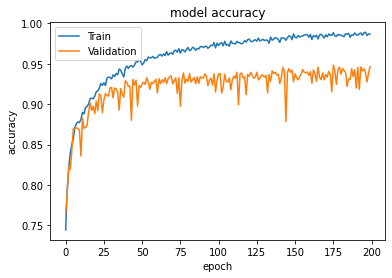

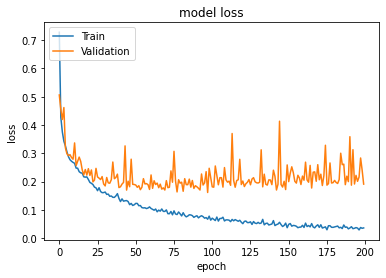

In [24]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
scores = model.evaluate(X2test2,y_test2,verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

accuracy: 94.63%


In [31]:
#normalise dataset NOT whole blood corrected
X2train2_norm = (X2train2 - np.amin(X2train2))/(np.amax(X2train2) - np.amin(X2train2))
X2test2_norm = (X2test2 - np.amin(X2test2))/(np.amax(X2test2) - np.amin(X2test2))

In [32]:
history3 = model.fit(X2train2_norm,y_train2, validation_data=(X2test2_norm, y_test2),epochs=200, batch_size=64)

Epoch 1/200
197/197 [==============================] - 2s 11ms/step - loss: 0.5207 - accuracy: 0.7935 - val_loss: 1.8046 - val_accuracy: 0.5039
Epoch 2/200
197/197 [==============================] - 2s 11ms/step - loss: 0.3612 - accuracy: 0.8362 - val_loss: 0.8492 - val_accuracy: 0.6428
Epoch 3/200
197/197 [==============================] - 2s 11ms/step - loss: 0.3235 - accuracy: 0.8560 - val_loss: 0.6836 - val_accuracy: 0.7052
Epoch 4/200
197/197 [==============================] - 2s 11ms/step - loss: 0.3010 - accuracy: 0.8693 - val_loss: 0.7706 - val_accuracy: 0.6481
Epoch 5/200
197/197 [==============================] - 2s 11ms/step - loss: 0.2812 - accuracy: 0.8800 - val_loss: 0.8367 - val_accuracy: 0.5922
Epoch 6/200
197/197 [==============================] - 2s 10ms/step - loss: 0.2732 - accuracy: 0.8841 - val_loss: 0.8517 - val_accuracy: 0.6222
Epoch 7/200
197/197 [==============================] - 2s 11ms/step - loss: 0.2558 - accuracy: 0.8924 - val_loss: 0.8150 - val_accuracy:

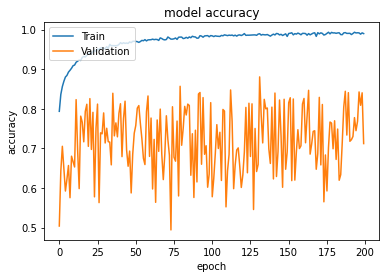

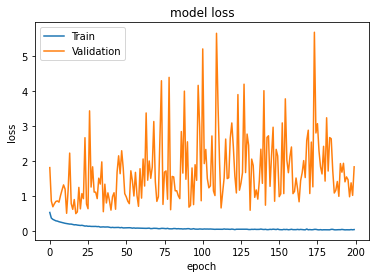

In [33]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
scores = model.evaluate(X2test2_norm,y_test2,verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

accuracy: 71.20%


In [36]:
#normalise the wb corrected dataset
X2train_norm = (X2train - np.amin(X2train))/(np.amax(X2train) - np.amin(X2train))
X2test_norm = (X2test - np.amin(X2test))/(np.amax(X2test) - np.amin(X2test))

In [37]:
history4 = model.fit(X2train_norm,y_train2, validation_data=(X2test_norm, y_test2),epochs=200, batch_size=64)

Epoch 1/200
197/197 [==============================] - 2s 11ms/step - loss: 0.7044 - accuracy: 0.7207 - val_loss: 0.5013 - val_accuracy: 0.7569
Epoch 2/200
197/197 [==============================] - 2s 10ms/step - loss: 0.4540 - accuracy: 0.7700 - val_loss: 0.4480 - val_accuracy: 0.7726
Epoch 3/200
197/197 [==============================] - 2s 11ms/step - loss: 0.4236 - accuracy: 0.7847 - val_loss: 0.4354 - val_accuracy: 0.7781
Epoch 4/200
197/197 [==============================] - 2s 11ms/step - loss: 0.4067 - accuracy: 0.7937 - val_loss: 0.4304 - val_accuracy: 0.7819
Epoch 5/200
197/197 [==============================] - 2s 11ms/step - loss: 0.3922 - accuracy: 0.7987 - val_loss: 0.4109 - val_accuracy: 0.7885
Epoch 6/200
197/197 [==============================] - 2s 11ms/step - loss: 0.3779 - accuracy: 0.8077 - val_loss: 0.3997 - val_accuracy: 0.7980
Epoch 7/200
197/197 [==============================] - 2s 11ms/step - loss: 0.3648 - accuracy: 0.8139 - val_loss: 0.3948 - val_accuracy: